In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv
load_dotenv()
model = ChatOpenAI()

In [6]:
class BatsmanState(TypedDict):
    
    runs : int
    balls : int
    fours : int
    sixes : int
    
    sr : float
    bpb : float
    boundry_percent : float
    summary : str

In [ ]:
def calculate_sr(state : BatsmanState) -> BatsmanState:
    
    sr = state['runs'] / state['balls'] * 100
    
    # state['sr'] = sr
    
    return {'sr' : sr}

In [11]:
def calculate_bpb(state : BatsmanState) -> BatsmanState:
    
    bpb = state['balls'] / (state['fours'] + state['sixes'])
    
    # state['bpb'] = bpb
    
    return {'bpb' : bpb}

In [12]:
def calculate_boundry_percent(state : BatsmanState) -> BatsmanState:
    
    boundry_percent = ((state['fours'] * 4) + (state['sixes'] * 6)) / state['runs'] * 100
    
    # state['boundry_percent'] = boundry_percent
    
    return {'boundry_percent' : boundry_percent}

In [13]:
def summary(state : BatsmanState) -> BatsmanState:
    
    summary = f"""
    strike Rate - {state['sr']} \n
    Balls per boundry - {state['bpb']} \n
    Boundry Percent : {state['boundry_percent']}
    """
    
    # state['summary'] = summary
    
    return {"summary" : summary}

In [15]:
# Create our graph
graph = StateGraph(BatsmanState)

# Add Nodes
graph.add_node("calculate_sr", calculate_sr)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_boundry_percent", calculate_boundry_percent)
graph.add_node("summary", summary)


# Add Edges
graph.add_edge(START, "calculate_sr")
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_boundry_percent")

graph.add_edge("calculate_sr", "summary")
graph.add_edge("calculate_bpb", "summary")
graph.add_edge("calculate_boundry_percent", "summary")

graph.add_edge("summary", END)

# Compile the graph
workflow = graph.compile()


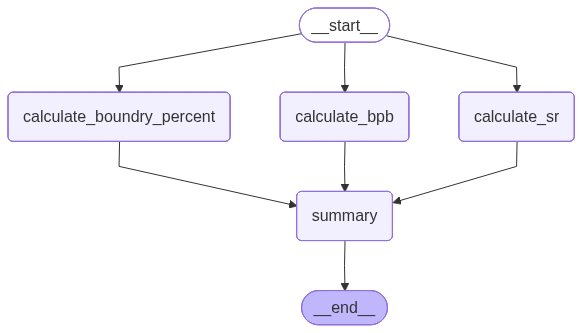

In [16]:
workflow

In [17]:
# Exwcute the graph
inital_state = {"runs" : 100, "balls" : 60, "fours" : 10, "sixes" : 5}

final_state = workflow.invoke(inital_state)

print(final_state)

{'runs': 100, 'balls': 60, 'fours': 10, 'sixes': 5, 'sr': 166.66666666666669, 'bpb': 4.0, 'boundry_percent': 70.0, 'summary': '\n    strike Rate - 166.66666666666669 \n\n    Balls per boundry - 4.0 \n\n    Boundry Percent : 70.0\n    '}
